In [5]:
import sys
import os
import networkx as nx
import pandas as pd
import numpy as np


src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

from Ising_Model.IsingModel import IsingModel


src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

In [6]:
edge_list_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\raw_graph\edges_list_soccer.csv'
edges_df = pd.read_csv(edge_list_path)

G = nx.from_pandas_edgelist(edges_df, source='source', target='target')

Simulating: 100%|██████████| 100/100 [01:05<00:00,  1.54temperature/s]


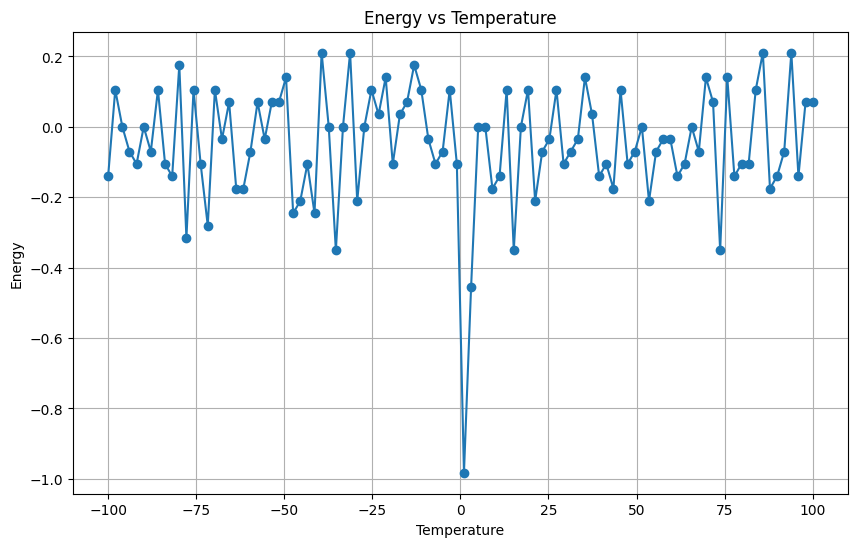

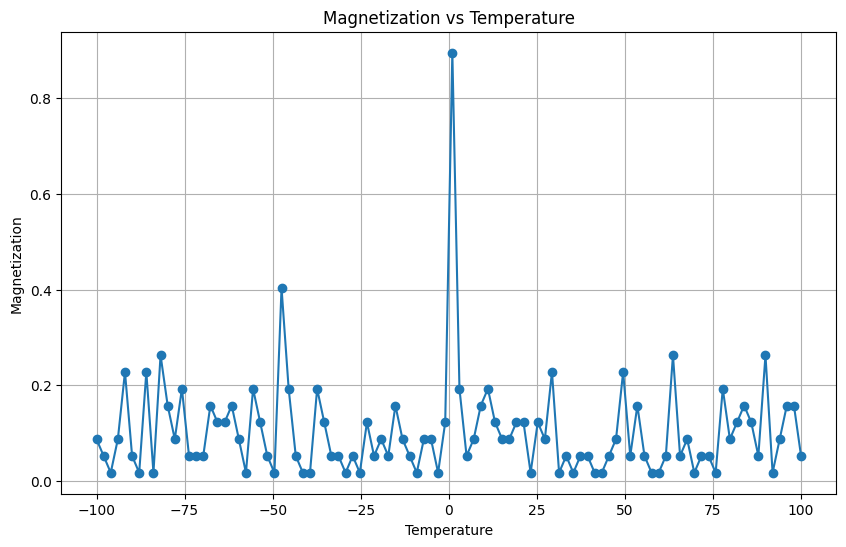

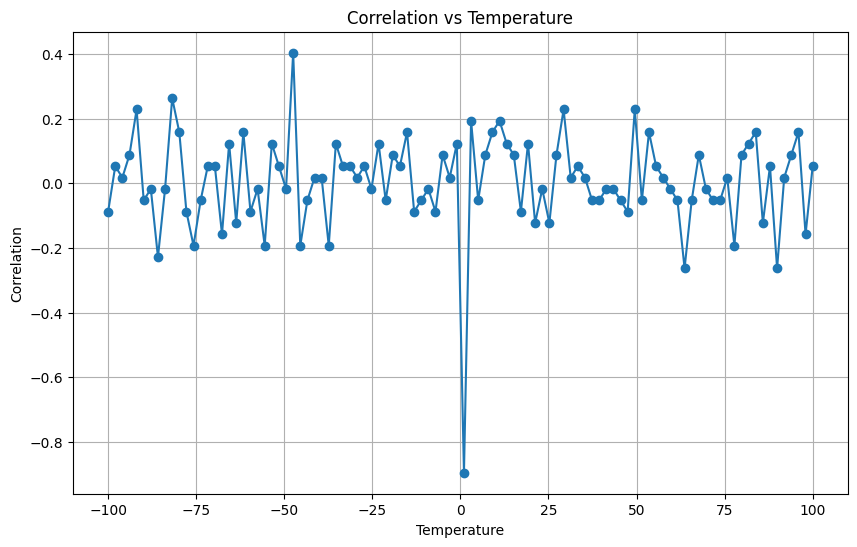

In [7]:
# Define temperature range and simulation parameters
temperatures = np.linspace(-100, 100, 100)  # From 0.1 to 4.0
steps_per_temperature = 50

# Run the simulation
ising_model = IsingModel(G)
energy_data, magnetization_data, correlation_data = ising_model.simulate(temperatures, steps_per_temperature)

# Plot the results
IsingModel.plot_quantity_vs_temperature(energy_data, temperatures, "Energy")
IsingModel.plot_quantity_vs_temperature(magnetization_data, temperatures, "Magnetization")
IsingModel.plot_quantity_vs_temperature(correlation_data, temperatures, "Correlation")

In [9]:
df = pd.DataFrame({
    'Temperature': temperatures,
    'Energy': energy_data,
    'Magnetization': magnetization_data,
    'Correlation': correlation_data
})

folder_path = r'C:\Users\User\OneDrive - Imperial College London\Desktop\Documents\GitHub\IBM-Datathon\Dataset\ising_data'
csv_file_path = os.path.join(folder_path, 'soccer_ising.csv')

df.to_csv(csv_file_path, index=False)